# <a id='toc1_'></a>[INAUGURAL PROJECT](#toc0_)
---------
Inaugural Project - Group Valros

### <a id='toc1_1_1_'></a>[Members:](#toc0_)
|Name | Student ID |
|:---:|:----------:|
| Johan Ølgaard | jlh601 |
| Alon Clausen | smr136 |
| Valdemar Guldager | gvz104 |


### <a id='toc1_1_2_'></a>[Description](#toc0_)
This projects aims to apply simple numerical code solutions and simultation methods. 
Furthermore we try to simulate a pre-specified economic model, which we will illustrate and solve in the following sections below. 

#### <a id='toc1_1_2_1_'></a>[Deadline](#toc0_)
26. March 2023
---------


------

## <a id='toc1_2_'></a>[Preliminaries](#toc0_)

Add further text if needed...

## <a id='toc1_3_'></a>[Imports](#toc0_)
We import the following packages:
numpy, matplotlib, scipy

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from HMOD1 import HouseholdSpecializationModelClass

-----

## <a id='toc1_4_'></a>[Question 1](#toc0_)


### <a id='toc1_4_1_'></a>[Methodology](#toc0_)
Below we import the class form HMOD1 whereafter we create an instance of the class. We then use the method to calculate the value of the function at the given points and print the result.



In [4]:
from HMOD1 import HouseholdSpecializationModelClass
import numpy as np

# create model
model = HouseholdSpecializationModelClass()

# set up alpha and sigma values to loop through
alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1.0, 1.5]

# set up array to store results
ratio_results = np.zeros((len(alpha_vals), len(sigma_vals)))

# loop through alpha and sigma values and solve model for each combination
for i, alpha in enumerate(alpha_vals):
    for j, sigma in enumerate(sigma_vals):
        # set model parameters
        model.par.alpha = alpha
        model.par.sigma = sigma
        
        # solve model
        sol = model.solve_discrete()
        
        # store ratio of HF to HM
        ratio_results[i, j] = sol.HF / sol.HM
        
# print results
print("Ratio of HF to HM:")
print(ratio_results)


/Users/vg/Desktop/projects-2023-valros/inauguralproject/V/HMOD1.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Ratio of HF to HM:
[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]



### <a id='toc1_4_2_'></a>[Question 1.2](#toc0_)
#### <a id='toc1_4_2_1_'></a>[Plot the ratios in a "Heatmap"](#toc0_)

------

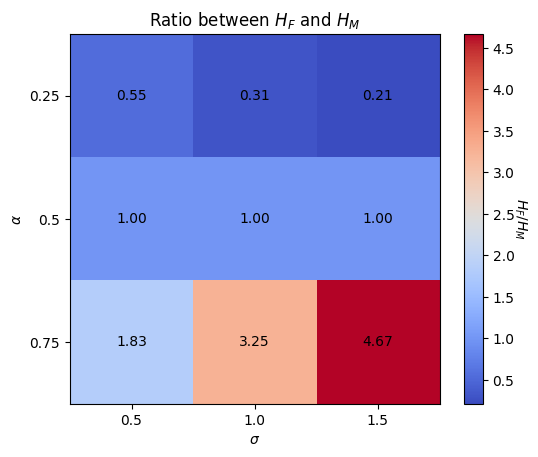

In [5]:
import matplotlib.pyplot as plt

# create heatmap of ratios
fig, ax = plt.subplots()
im = ax.imshow(ratio_results, cmap='coolwarm')

# set tick labels
ax.set_xticks(np.arange(len(sigma_vals)))
ax.set_yticks(np.arange(len(alpha_vals)))
ax.set_xticklabels(sigma_vals)
ax.set_yticklabels(alpha_vals)
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\alpha$')

# add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(r'$H_F/H_M$', rotation=270, labelpad=10)

# loop over data and add annotations
for i in range(len(alpha_vals)):
    for j in range(len(sigma_vals)):
        text = ax.text(j, i, f"{ratio_results[i, j]:.2f}",
                       ha="center", va="center", color="black")

# set plot title
plt.title("Ratio between" + " " + r'$H_F$' + " " + "and" + " " r'$H_M$')

# show plot
plt.show()


-------
## <a id='toc1_5_'></a>[Question 2](#toc0_)

### <a id='toc1_5_1_'></a>[Methodology](#toc0_)
In this part we will use the same methodology as in the previous part. We will use the same data set and the same model. We will only change the way we calculate the ratios.

-------

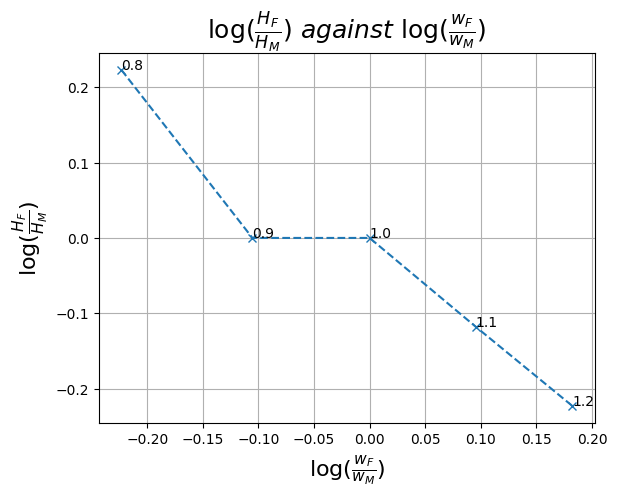

In [21]:
model = HouseholdSpecializationModelClass()

# solve for HF/HM ratios
HF_HM_ratios = model.solve_wF_vec(discrete=True)

# run regression
model.run_regression()

# plot results
plt.plot(np.log(model.par.wF_vec), np.log(HF_HM_ratios), marker = "x", linestyle = "--")
plt.xlabel(r'$\log(\frac{w_F}{w_M})$', fontsize = 16)
plt.ylabel(r'$\log(\frac{H_F}{H_M})$', fontsize = 16)
plt.title(r'$\log(\frac{H_F}{H_M}) \ against \ \log(\frac{w_F}{w_M})$', fontsize = 18)
"Log(HF/HM) vs. Log(wF/wM)"
# add labels to scatter plot points
for i, txt in enumerate(model.par.wF_vec):
    plt.annotate(txt, (np.log(model.par.wF_vec[i]), np.log(HF_HM_ratios[i])))

plt.grid(True)
plt.show()


------

## <a id='toc1_6_'></a>[Question 3](#toc0_)
We now assume that the choice set is continuous. We will use the same data set and the same model. We will only change the way we calculate the ratios.

------

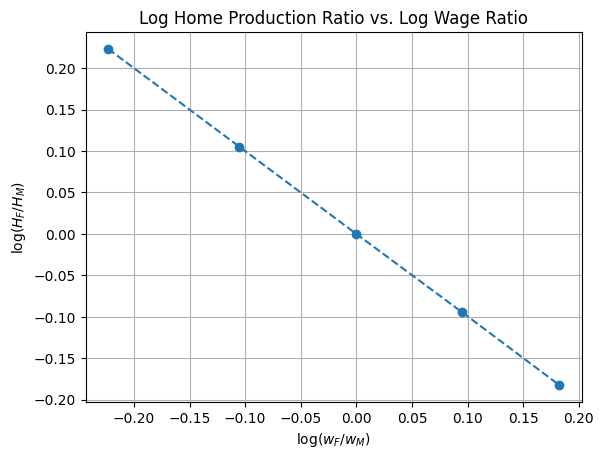

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from HMOD1 import HouseholdSpecializationModelClass

# Instantiate the model
model = HouseholdSpecializationModelClass()

# Solve the model for the vector of female wages
HF_HM_ratios = model.solve_wF_vec()

# Calculate log ratios
log_wage_ratios = np.log(model.par.wF_vec / model.par.wM)
log_HF_HM_ratios = np.log(HF_HM_ratios)

# Create the plot
plt.plot(log_wage_ratios, log_HF_HM_ratios, marker='o', linestyle='--')
plt.xlabel('$\log(w_F/w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
plt.title('Log Home Production Ratio vs. Log Wage Ratio')
plt.grid(True)
plt.show()



------
## <a id='toc1_7_'></a>[Question 4](#toc0_)
To minimize the objective function $\left(\beta_0-\hat{\beta}_0\right)^2+\left(\beta_1-\hat{\beta}_1\right)^2$ and find the best values for $\alpha$ and $\sigma$, you can use the following approach:

Define a function to calculate the objective function for given $\alpha$ and $\sigma$.
Use an optimization method like grid search or gradient-based optimization to find the best values for $\alpha$ and $\sigma$.

------

In [14]:
import numpy as np
from scipy import optimize
from HMOD1 import HouseholdSpecializationModelClass

# 1. Define the objective function
def objective(params, model):
    alpha, sigma = params
    model.par.alpha = alpha
    model.par.sigma = sigma
    
    # Solve the model for the vector of female wages and run the regression
    model.solve_wF_vec()
    model.run_regression()
    
    beta0_diff = (model.par.beta0_target - model.sol.beta0)**2
    beta1_diff = (model.par.beta1_target - model.sol.beta1)**2
    
    return beta0_diff + beta1_diff

# 2. Optimize the objective function
model = HouseholdSpecializationModelClass()

# Define the initial guess and bounds for the parameters
x0 = [0.5, 1.0]
bounds = [(0.01, 0.99), (0.01, 5.0)]

# Optimize using the minimize function from the scipy library
opt_result = optimize.minimize(objective, x0, args=(model), bounds=bounds)

# Print the optimal values for alpha and sigma
alpha_opt, sigma_opt = opt_result.x
print(f'Optimal alpha: {alpha_opt:.4f}')
print(f'Optimal sigma: {sigma_opt:.4f}')


Optimal alpha: 0.5000
Optimal sigma: 1.0000


beta0_hat: nan
beta1_hat: nan
alpha_hat: 0.5000
sigma_hat: 1.0000


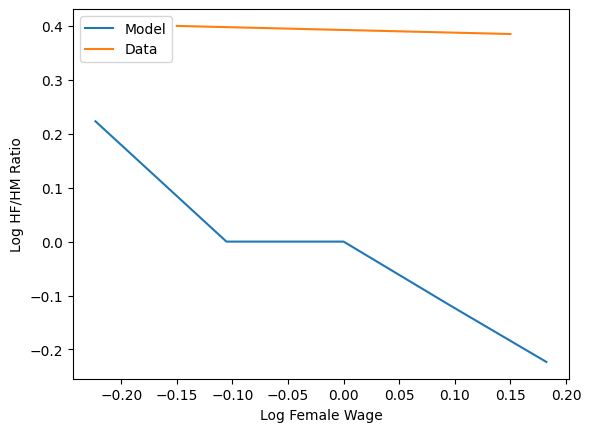

In [22]:
from HMOD1 import HouseholdSpecializationModelClass
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Step 1: Import the class
# Done in the code

# Step 2: Initialize an instance of the class
hmod = HouseholdSpecializationModelClass()

# Step 3: Solve the model for a range of female wages
hmod.solve_wF_vec(discrete=True)

# Step 4: Estimate the coefficients from the model results
hmod.run_regression()
beta0_hat = hmod.sol.beta0
beta1_hat = hmod.sol.beta1
print(f"beta0_hat: {beta0_hat:.4f}")
print(f"beta1_hat: {beta1_hat:.4f}")

# Step 5: Define a function to calculate the squared difference between the estimated and actual coefficients
def squared_difference(params, beta0, beta1):
    alpha, sigma = params
    hmod.par.alpha = alpha
    hmod.par.sigma = sigma
    hmod.solve_wF_vec(discrete=True)
    hmod.run_regression()
    return (hmod.sol.beta0 - beta0)**2 + (hmod.sol.beta1 - beta1)**2

# Step 6: Minimize the squared difference function to find the best values of alpha and sigma
beta0 = 0.4
beta1 = -0.1
res = optimize.minimize(squared_difference, x0=[0.5, 1.0], args=(beta0, beta1))
alpha_hat = res.x[0]
sigma_hat = res.x[1]
print(f"alpha_hat: {alpha_hat:.4f}")
print(f"sigma_hat: {sigma_hat:.4f}")

# Step 7: Plot the model results against the data and discuss the economic interpretation of the results
hmod.par.alpha = alpha_hat
hmod.par.sigma = sigma_hat
HF_HM_ratios = hmod.solve_wF_vec(discrete=True)

plt.plot(np.log(hmod.par.wF_vec), np.log(HF_HM_ratios), label="Model")
plt.plot([-0.15, 0.15], [beta0, beta0+beta1*0.15], label="Data")
plt.xlabel("Log Female Wage")
plt.ylabel("Log HF/HM Ratio")
plt.legend()
plt.show()


------
## <a id='toc1_8_'></a>[Question 5](#toc0_)


------